In [145]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans

PROCESSING THE IMAGE READING IT USING OPENCV IMREAD AND RESIZING IT TO MAKE IT HANDALABLE THEN WE ARE CONVERTING THE ROWS AND COLUMNS TO A VECTOR ROW*COLUMN OF RESIZED IMAGE PIXELS in this you can pass the name of image in line instead of image.jpg but image should be in the same folder as this jupyter notebook

(168, 300, 3)
(168, 300, 3)
(50400, 3)


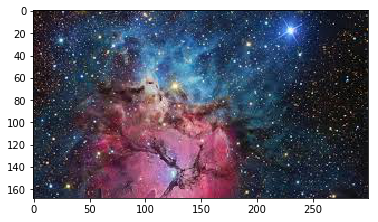

In [146]:
aim = cv2.imread('./image.jpg')
im = cv2.cvtColor(aim, cv2.COLOR_BGR2RGB)
print im.shape
r, c = im.shape[:2]
out_r = 168
im = cv2.resize(im, (int(out_r*float(c)/r), out_r))
print im.shape
pixels = im.reshape((-1, 3))

print pixels.shape
plt.imshow(im)

APPLYING K MEANS FROM SCIKIT LEARN ON PIXELS AND FINDING 8 MOST DOMINANT COLORS IN THE IMAGE USING NUMBER OF CLUSTERS = 8 you can also change the number of clusters

In [147]:
km = KMeans(n_clusters=10)
km.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [148]:
im.shape[:2]

(168, 300)

In [149]:
im

array([[[40, 27, 21],
        [39, 26, 20],
        [35, 22, 16],
        ..., 
        [35, 34, 39],
        [17, 16, 22],
        [20, 19, 27]],

       [[57, 44, 38],
        [47, 34, 28],
        [43, 30, 24],
        ..., 
        [51, 50, 55],
        [22, 21, 27],
        [28, 27, 33]],

       [[44, 31, 25],
        [33, 20, 14],
        [25, 12,  6],
        ..., 
        [23, 22, 27],
        [ 0,  0,  4],
        [22, 21, 27]],

       ..., 
       [[20, 22, 35],
        [31, 33, 46],
        [50, 54, 66],
        ..., 
        [20, 21, 26],
        [23, 24, 29],
        [31, 32, 37]],

       [[33, 37, 49],
        [32, 36, 48],
        [35, 39, 51],
        ..., 
        [20, 21, 26],
        [21, 22, 27],
        [26, 27, 32]],

       [[25, 29, 41],
        [24, 28, 40],
        [35, 39, 51],
        ..., 
        [17, 18, 23],
        [21, 22, 27],
        [29, 30, 35]]], dtype=uint8)

THE CLUSTER CENTRES ARE CONVERTED TO NUMPY ARRAYS

In [150]:
colors = np.asarray(km.cluster_centers_, dtype='uint8')

In [151]:
colors.shape

(10, 3)

In [152]:
colors


array([[ 59,  93, 133],
       [ 31,  39,  56],
       [187, 122, 151],
       [111,  62,  81],
       [153,  89, 110],
       [ 71,  47,  60],
       [ 91, 137, 177],
       [ 20,  20,  25],
       [182, 184, 202],
       [ 39,  64,  94]], dtype=uint8)

CALCULATING THE PERCENTAGE OF VARIOUS COLORS IDENTIFIED BY K MEANS AND ASSIGNED CLUSTER CENTRES

In [153]:
per = np.asarray(np.unique(km.labels_, return_counts=True)[1], dtype='float32')
per = per / pixels.shape[0]
per

array([ 0.08724207,  0.21462302,  0.05759921,  0.07609127,  0.06579365,
        0.09462301,  0.04793651,  0.17890874,  0.02063492,  0.15654762], dtype=float32)

PLOTING DIFFERENT CLUSTER COLORS AS SEPARATE SUBPLOT PATCHES 255 - colors[ix] is because to get the real color as in opencv the color is oppositely stored basically instead of rgb it is bgr

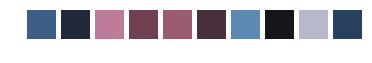

In [154]:
plt.figure(0)
for ix in range(colors.shape[0]):
    patch = np.ones((20, 20, 3))
    patch[:, :, :] = 255 - colors[ix]
    plt.subplot(1, colors.shape[0], ix+1)
    plt.axis("off")
    plt.imshow(patch)

CREATING A LIST OF LIST OF PERCENTAGE AND CORRESPONDING COLOR TYPE

In [155]:
dom = [[per[ix], colors[ix]] for ix in range(km.n_clusters)]
DOM = sorted(dom, key=lambda z: z[0], reverse=True)

PLOTTING COLORS ACCORDING TO THEIR PERCENTAGE ON A PATCH

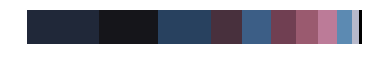

In [156]:
plt.figure(0)
plt.axis('off')

patch = np.zeros((50, 500, 3))

start = 0
for cx in range(km.n_clusters):
    width = int(DOM[cx][0] * patch.shape[1])
    end = start + width
    patch[:, start:end, :] = 255 - DOM[cx][1]
    start = end

plt.imshow(patch)
plt.show()

In [157]:
print patch.shape

(50, 500, 3)


In [158]:
print patch

[[[ 224.  216.  199.]
  [ 224.  216.  199.]
  [ 224.  216.  199.]
  ..., 
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[ 224.  216.  199.]
  [ 224.  216.  199.]
  [ 224.  216.  199.]
  ..., 
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[ 224.  216.  199.]
  [ 224.  216.  199.]
  [ 224.  216.  199.]
  ..., 
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 ..., 
 [[ 224.  216.  199.]
  [ 224.  216.  199.]
  [ 224.  216.  199.]
  ..., 
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[ 224.  216.  199.]
  [ 224.  216.  199.]
  [ 224.  216.  199.]
  ..., 
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[ 224.  216.  199.]
  [ 224.  216.  199.]
  [ 224.  216.  199.]
  ..., 
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]]


In [159]:
n = km.labels_
ce = km.cluster_centers_
res = ce[n.flatten()]
res = res.reshape((im.shape))
#n

In [160]:
res.shape

(168, 300, 3)

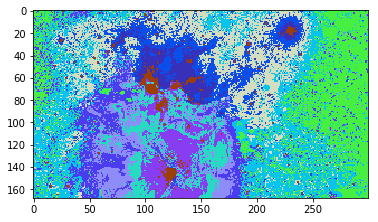

In [161]:
plt.imshow(res)

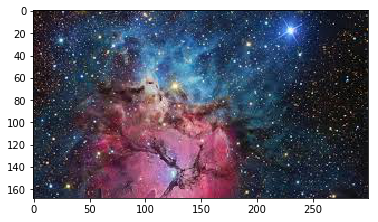

In [173]:
plt.imshow(im)

In [174]:
im

array([[[40, 27, 21],
        [39, 26, 20],
        [35, 22, 16],
        ..., 
        [35, 34, 39],
        [17, 16, 22],
        [20, 19, 27]],

       [[57, 44, 38],
        [47, 34, 28],
        [43, 30, 24],
        ..., 
        [51, 50, 55],
        [22, 21, 27],
        [28, 27, 33]],

       [[44, 31, 25],
        [33, 20, 14],
        [25, 12,  6],
        ..., 
        [23, 22, 27],
        [ 0,  0,  4],
        [22, 21, 27]],

       ..., 
       [[20, 22, 35],
        [31, 33, 46],
        [50, 54, 66],
        ..., 
        [20, 21, 26],
        [23, 24, 29],
        [31, 32, 37]],

       [[33, 37, 49],
        [32, 36, 48],
        [35, 39, 51],
        ..., 
        [20, 21, 26],
        [21, 22, 27],
        [26, 27, 32]],

       [[25, 29, 41],
        [24, 28, 40],
        [35, 39, 51],
        ..., 
        [17, 18, 23],
        [21, 22, 27],
        [29, 30, 35]]], dtype=uint8)

In [178]:
n.shape

(50400,)

In [179]:
n

array([7, 7, 7, ..., 7, 7, 7], dtype=int32)

In [182]:
pixels 

array([[40, 27, 21],
       [39, 26, 20],
       [35, 22, 16],
       ..., 
       [17, 18, 23],
       [21, 22, 27],
       [29, 30, 35]], dtype=uint8)

In [183]:
im

array([[[40, 27, 21],
        [39, 26, 20],
        [35, 22, 16],
        ..., 
        [35, 34, 39],
        [17, 16, 22],
        [20, 19, 27]],

       [[57, 44, 38],
        [47, 34, 28],
        [43, 30, 24],
        ..., 
        [51, 50, 55],
        [22, 21, 27],
        [28, 27, 33]],

       [[44, 31, 25],
        [33, 20, 14],
        [25, 12,  6],
        ..., 
        [23, 22, 27],
        [ 0,  0,  4],
        [22, 21, 27]],

       ..., 
       [[20, 22, 35],
        [31, 33, 46],
        [50, 54, 66],
        ..., 
        [20, 21, 26],
        [23, 24, 29],
        [31, 32, 37]],

       [[33, 37, 49],
        [32, 36, 48],
        [35, 39, 51],
        ..., 
        [20, 21, 26],
        [21, 22, 27],
        [26, 27, 32]],

       [[25, 29, 41],
        [24, 28, 40],
        [35, 39, 51],
        ..., 
        [17, 18, 23],
        [21, 22, 27],
        [29, 30, 35]]], dtype=uint8)

In [171]:
res.shape

(168, 300, 3)

In [172]:
im==res

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ..., 
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ..., 
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ..., 
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ..., 
       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ..., 
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ..., 
        [False, False, False],
        [False, False, False],
        [F